In [1]:
# -*- coding: utf-8 -*-
"""
Predicitve_Analytics.py
"""
#using minmax normalization
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
import copy
import random
import matplotlib as plt
import sys 
sys.setrecursionlimit(10**6) 
#data = 'C:/Users/Astrid/Documents/DIC/Assignment1/data.csv'
dataframe = pd.read_csv('C:/Users/Astrid/Documents/DIC/Assignment1/data.csv')
data_X = dataframe.iloc[:,0:48]
data_X = (data_X - np.min(data_X))/(np.max(data_X) - np.min(data_X)).values
data_X = np.array(data_X)
#print(data_X.shape)

data_Y = dataframe['48'].values
data_Y = np.array(data_Y)
#print(data_Y.shape)

#normalizing data
#from sklearn import preprocessing
#data_X = preprocessing.MinMaxScaler().fit_transform(data_X)

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data_X, data_Y, test_size=0.3, random_state=50)
print("After splitting into train-test")
print("x train : ", X_train.shape) 
print("x test  : ", X_test.shape) 
print("y train : ", Y_train.shape)
print("y test  : ", Y_test.shape)
print(type(Y_test))

After splitting into train-test
x train :  (28669, 48)
x test  :  (12287, 48)
y train :  (28669,)
y test  :  (12287,)
<class 'numpy.ndarray'>


In [199]:
def Accuracy(y_true,y_pred):
    """
    :type y_true: numpy.ndarray
    :type y_pred: numpy.ndarray
    :rtype: float
    
    """
    accuracy_scores = []
    correct_pred = 0
    for i in range(len(y_true)):
        if (y_true[i] == y_pred[i]):
            correct_pred  = correct_pred + 1
    acc = (correct_pred / float(len(y_true))) * 100.0
    accuracy_scores.append(acc)
    accuracy = sum(accuracy_scores) / len(accuracy_scores)
    return accuracy

In [200]:
def Recall(y_true,y_pred):
    """
    :type y_true: numpy.ndarray
    :type y_pred: numpy.ndarray
    :rtype: float
    """
    recall_scores = []
    true_positive_cnt = 0
    cnt = 0
    for i in range(len(y_true)):
        if(y_true[i] == 1):
            cnt = cnt + 1
            if(y_true[i] == y_pred[i]):
                true_positive_cnt = true_positive_cnt + 1 
    recall_partial = (true_positive_cnt / cnt) * 100.0
    recall_scores.append(recall_partial)
    recall = sum(recall_scores) / len(recall_scores)
    return recall


In [201]:
def Precision(y_true,y_pred):
    """
    :type y_true: numpy.ndarray
    :type y_pred: numpy.ndarray
    :rtype: float
    """
    precision_scores = []
    true_positive_cnt = 0
    cnt = 0
    for i in range(len(y_true)):
        if(y_pred[i] == 1):
            cnt = cnt + 1
            if(y_true[i] == y_pred[i]):
                true_positive_cnt = true_positive_cnt + 1
    precision_partial = (true_positive_cnt / cnt) * 100.0
    precision_scores.append(precision_partial)
    precision = sum(precision_scores) / len(precision_scores) 
    return precision


In [202]:
def WCSS(Clusters,centriods_use):
    """
    :Clusters List[numpy.ndarray]
    :rtype: float
    """
    wcss = 0
    # Euclidean Distance Caculator
    def dist(a, b, ax=1):
        return np.linalg.norm(a - b)
    for i in range(len(Clusters)):
        wcss = wcss + dist(Clusters[i],centriods_use[i]) * dist(Clusters[i],centriods_use[i])
    #print(wcss)
    return wcss

In [203]:
def ConfusionMatrix(y_true,y_pred):
    """
    :type y_true: numpy.ndarray
    :type y_pred: numpy.ndarray
    :rtype: float
    """  
    classes = np.unique(np.concatenate((y_true,y_pred)))
    conf_mat = np.empty((len(classes),len(classes)),dtype=np.int)
    for i,x in enumerate(classes):
        for j,y in enumerate(classes):
            conf_mat[i,j] = np.where((y_true==x) * (y_pred==y))[0].shape[0]
    
    return conf_mat

In [204]:
def KNN(X_train,X_test,Y_train,N):
    """
    :type X_train: numpy.ndarray
    :type X_test: numpy.ndarray
    :type Y_train: numpy.ndarray
    
    :rtype: numpy.ndarray
    """
    #y_train_new=[]
    #for i in Y_train:
        #for j in i:
            #y_train_new.append(j)
    K=N        
    def distmat(a, b):
        return np.linalg.norm(a - b,axis=1)


    m=X_train.shape[0] 
    n=X_test.shape[0] 
    
    p=Y_train.shape[0]
    q=Y_test.shape[0]
    final_pred=[]
    for i in range(n):
        arr=np.tile(X_test[i],(m,1))
        value=distmat(arr,X_train)
        sorted_indices=np.argsort(value)
        label_pred=[]
        for q in range(K):
            l=sorted_indices[q]        
            label_pred.append(Y_train[l])     
        a=np.array(label_pred)
        counts = np.bincount(a) 
        final_pred.append(np.argmax(counts))
    true_pred=np.array(final_pred)
    return true_pred


In [205]:
def PCA(X_train,N):
    """
    :type X_train: numpy.ndarray
    :type N: int
    :rtype: numpy.ndarray
    """
    #Standardising the dataset by centering the mean and scaling each component to unit variance 
    X_train = preprocessing.scale(X_train)

    #Computing the covariance matrix to find correlation between datapoints
    X_covariance_matrix = np.cov(X_train.T)

    #Finding eigen values, eigen vectors
    eig_vals,eig_vects = np.linalg.eig(X_covariance_matrix)

    #Forming eigenvalues,eigen-vector pairs
    eig_pairs = [((eig_vals[i]),eig_vects[:,i])for i in range(len(eig_vals))]

    #Sorting the eigenvalues
    eig_pairs.sort(key=lambda X:X[0],reverse=True)

    #Getting the top n_components vectors
    n_comp_vects = eig_vects[:,:N]

    #Finding the reduced dimensionality by multiplying it with original matrix
    red_dim_mat = np.dot(X_train,n_comp_vects)
    #print(red_dim_mat)
    return red_dim_mat



In [206]:
def Kmeans(X_train,N):
    """
    :type X_train: numpy.ndarray
    :type N: int
    :rtype: List[numpy.ndarray]
    """
    K = N
    m = X_train.shape[0] 
    n = X_train.shape[1] 
    # Euclidean Distance Calculator
    def dist(a, b, ax=1):
        return np.linalg.norm(a - b,)

    #Taking Centroid matrix
    Centroids=np.array([]).reshape(n,0) 

    #randomly selecting centroid
    for i in range(K):
        rand = random.randint(0,m-1)
        Centroids = np.c_[Centroids,X_train[rand]]

    #Taking transpose
    centriods_use = Centroids.T

    #Storing the value of centroids when it updates
    centriods_previous = np.zeros(centriods_use.shape)

    # Calculating Error func. - Distance between new centroids and old centroids
    error = dist(centriods_use, centriods_previous, None)

    array_index = []
    centroid = []

    for i in range(len(X_train)):
        array_index.append(0)
        centroid.append(0)
    while error != 0:
        # Assigning each value to its closest cluster
        for i in range(len(X_train)):
            length_dist = []
            for j in range(K):
                distances = dist(X_train[i], centriods_use[j])
                length_dist.append(distances)
            array_index[i] = length_dist.index(min(length_dist))
            centroid[i] = centriods_use[array_index[i]]
        centriods_previous = copy.deepcopy(centriods_use)
        # Finding the new centroids by taking the average value
        for i in range(K):
            points = [X_train[j] for j in range(len(X_train)) if array_index[j] == i]
            centriods_use[i] = np.mean(points, axis=0)  
        error = dist(centriods_use, centriods_previous, None)   
    sum1=0
    clusters=[]

    for i in range(K):
        mini_clusters = []
        for j in range(len(X_train)):
            if(array_index[j] == i):
                mini_clusters.append(X_train[j])
        clusters.append(mini_clusters)       
    clusters1 = np.array(clusters)
    return clusters1,centriods_use
    


In [207]:
def SklearnSupervisedLearning(X_train,Y_train,X_test, Y_test):
    """
    :type X_train: numpy.ndarray
    :type X_test: numpy.ndarray
    :type Y_train: numpy.ndarray
    
    :rtype: List[numpy.ndarray] 
    """
    #SVM (using linear kernel)
    from sklearn import svm
    clf = svm.SVC(kernel='linear') 
    clf.fit(X_train, Y_train)
    y_pred_svm = clf.predict(X_test)
    print('Accuracy for SVM: ', Accuracy(Y_test,y_pred_svm))
     
    #Logistic regression
    from sklearn.linear_model import LogisticRegression
    lr = LogisticRegression()
    lr.fit(X_train, Y_train)
    y_pred_lr = lr.predict(X_test)
    print('Accuracy for Logistic regression: ', Accuracy(Y_test,y_pred_lr))

    #Decision Trees
    from sklearn.tree import DecisionTreeClassifier
    classifier = DecisionTreeClassifier()
    classifier.fit(X_train, Y_train)
    y_pred_dt = classifier.predict(X_test)
    print('Accuracy for Decision Tree: ', Accuracy(Y_test,y_pred_dt))

    #K-nn
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors=11)
    knn.fit(X_train, Y_train)
    y_pred_knn = knn.predict(X_test)  
    print('Accuracy for K-nn: ', Accuracy(Y_test,y_pred_knn))

    list_all = []
    list_all.append(y_pred_svm)
    list_all.append(y_pred_lr)
    list_all.append(y_pred_dt)
    list_all.append(y_pred_knn)
    return list_all



In [208]:
def SklearnVotingClassifier(X_train,Y_train,X_test,Y_test):
    
    """
    :type X_train: numpy.ndarray
    :type X_test: numpy.ndarray
    :type Y_train: numpy.ndarray
    
    :rtype: numpy.ndarray
    """
    import pandas
    from sklearn import model_selection
    from sklearn.linear_model import LogisticRegression
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.svm import SVC
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.ensemble import VotingClassifier
    
    kfold = model_selection.KFold(n_splits=5, random_state=5)

    # creating the sub models
    estimators = []
    model1 = SVC(kernel='linear')
    estimators.append(('svm', model1))
    model2 = LogisticRegression()
    estimators.append(('logistic', model2))
    model3 = DecisionTreeClassifier()
    estimators.append(('cart', model3))
    model4 = KNeighborsClassifier()
    estimators.append(('knn', model4))

    # creating the ensemble model
    ensemble_model = VotingClassifier(estimators, voting='hard')
    ensemble_model.fit(X_train, Y_train)
    y_pred_ensemble = ensemble_model.predict(X_test)
    print('Accuracy for ensemble model: ', Accuracy(Y_test,y_pred_ensemble))
    return y_pred_ensemble


In [209]:
def VisualizationConfusionMatrix(Y_test, y_pred):
    import matplotlib.pyplot as plt
    %matplotlib inline
    
    labels = np.unique(np.concatenate((Y_test,y_pred))).tolist()
    cm = ConfusionMatrix(Y_test,y_pred)
    print(cm)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm)
    plt.title('Confusion matrix of the classifier')
    fig.colorbar(cax)
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()  

In [167]:
y_pred=KNN(X_train,X_test,Y_train,11)

In [144]:
#Accuracy,Recall Precision 
print(Accuracy(y_pred,Y_test))
print(Recall(y_pred,Y_test))
print(Precision(y_pred,Y_test))

98.41295678359242
98.16007359705611
97.88990825688073


In [145]:
red_dim_mat=PCA(X_train,4)

In [146]:
print(red_dim_mat)

[[ 4.99779250e-01 -3.04512125e-03  7.43022353e-01 -4.01214055e-01]
 [-5.42021757e+00  9.58345132e-01 -7.09221914e-01 -2.30280105e+00]
 [-1.44595929e+00 -8.89612032e-01 -1.30023227e+00  3.23044930e+00]
 ...
 [-2.50634848e+00 -5.94852179e-01  1.60077174e+00 -3.08984215e+00]
 [ 5.28849594e-02 -3.10782813e-01  1.92459802e+00  9.66196011e-01]
 [-5.51358780e-01 -7.72471950e-01  3.74633312e+00 -1.45206576e+00]]


In [196]:
#To crosscheck PCA with sklearns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pca1=pca.fit_transform(X_train)
print(pca1)

[[ 0.51029324 -0.02692387  0.04045508  0.06263983]
 [-1.00242518  0.11631759  0.08935833  0.15992442]
 [-0.37322329 -0.26982917  0.04600288 -0.20266988]
 ...
 [-0.14763306 -0.13757096 -0.01347299  0.20362135]
 [ 0.34080362  0.1145302  -0.06448933  0.05249532]
 [ 0.40121589 -0.12793732 -0.04323234  0.12886708]]


In [168]:
clusters,centriods_use=Kmeans(X_train,11)

In [169]:
print(len(clusters))
print(len(centriods_use))

11
11


In [170]:
wcss=WCSS(clusters,centriods_use)
print(wcss)

3579.303565753461


In [210]:
#To crosscheck the kmeans with Sklearns
from sklearn.cluster import KMeans
import numpy as np
kmeans = KMeans(n_clusters=11, random_state=0).fit(X_train)
kmeans.labels_
kmeans.predict(X_train)
kmeans.cluster_centers_
print(kmeans.inertia_)       
print(centriods_use[1][2])  
print(kmeans.cluster_centers_[1][2])

3367.3085588733306
0.6477266993359324
0.6451027614162774


In [172]:
list_final_all=SklearnSupervisedLearning(X_train,Y_train,X_test, Y_test)

Accuracy for SVM:  89.3952958411329


C:\Users\Astrid\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Astrid\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy for Logistic regression:  71.19720029299259
Accuracy for Decision Tree:  98.2094897045658
Accuracy for K-nn:  98.41295678359242


In [173]:
print(list_final_all)

[array([ 1,  7,  7, ..., 11, 11,  7], dtype=int64), array([ 1,  7,  7, ..., 11, 11,  7], dtype=int64), array([ 1,  7,  7, ..., 11, 11,  7], dtype=int64), array([ 1,  7,  7, ..., 11, 11,  7], dtype=int64)]


In [174]:
array_final=SklearnVotingClassifier(X_train,Y_train,X_test,Y_test)

C:\Users\Astrid\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Astrid\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy for ensemble model:  95.47489216244811


In [175]:
print(array_final)

[ 1  7  7 ... 11 11  7]


In [176]:
def VisualizationConfusionMatrix(Y_test, y_pred):
    import matplotlib.pyplot as plt
    %matplotlib inline
    
    labels = np.unique(np.concatenate((Y_test,y_pred))).tolist()
    cm = ConfusionMatrix(Y_test,y_pred)
    print(cm)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm)
    plt.title('Confusion matrix of the classifier')
    fig.colorbar(cax)
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()  

[[1032    0    0    0    0   55    0    0    3    0    0]
 [   1  973    0    0    0    0    0    0    0  132    0]
 [   0    0 1072    0   52    0    0    0    0    0    0]
 [   0    0   63 1034    5    0    0    0    0    0    0]
 [   0    0   32   38  875    0    0  220    0    0    0]
 [  44    0    0    0    0  876    0    0  171    0    0]
 [   0    0    0    0    0    0 1117    0    0    0    0]
 [   0    0    0    5   79    0    0 1031    0    0    0]
 [  24    4    0    0    0  237    0    0  897    0    0]
 [   0  138    0    0    0    0    0    0    0  961    0]
 [   0    0    0    0    0    0    0    0    0    0 1116]]


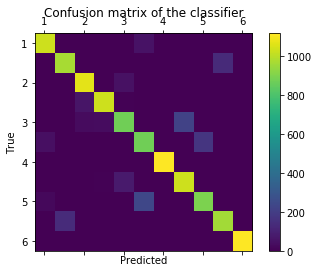

In [177]:
VisualizationConfusionMatrix(Y_test, list_final_all[0])

[[1032    0    0    0    1   49    0    5    3    0    0]
 [   1  561  110    7    5    0    0    0    0  422    0]
 [   0  172  612   63  155   14    0    0    5  103    0]
 [   0   14  129  797   34    0   29    0    0   99    0]
 [  20   11  143   80  637   67    0  172   17   18    0]
 [ 220    5    8    0   40  665    0   19  134    0    0]
 [   0    0    0    0    0    0 1117    0    0    0    0]
 [  72    1    3   13  197   65    0  757    6    1    0]
 [  76   24   23    1   88  349    0    9  582   10    0]
 [   0  187   37    3    0    0    0    0    0  872    0]
 [   0    0    0    0    0    0    0    0    0    0 1116]]


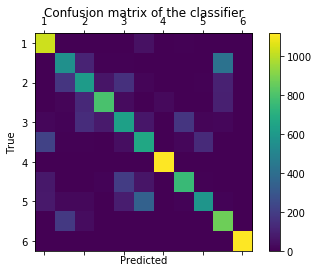

In [178]:
VisualizationConfusionMatrix(Y_test, list_final_all[1])

[[1065    0    0    0    0   18    0    0    7    0    0]
 [   0 1089    0    0    0    0    0    0    1   16    0]
 [   1    0 1107    1   13    0    0    2    0    0    0]
 [   0    0    2 1088    7    0    0    5    0    0    0]
 [   0    0    9    5 1127    0    0   24    0    0    0]
 [  22    0    0    0    0 1053    0    0   16    0    0]
 [   0    0    0    0    0    0 1117    0    0    0    0]
 [   0    0    1    0   24    0    0 1090    0    0    0]
 [   4    0    0    0    0   23    0    0 1135    0    0]
 [   0   19    0    0    0    0    0    0    0 1080    0]
 [   0    0    0    0    0    0    0    0    0    0 1116]]


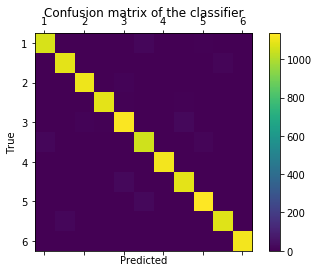

In [179]:
VisualizationConfusionMatrix(Y_test, list_final_all[2])

[[1067    0    0    0    0   22    0    1    0    0    0]
 [   0 1068    0    0    0    0    0    0    1   37    0]
 [   0    0 1122    1    1    0    0    0    0    0    0]
 [   0    0    4 1093    3    0    0    2    0    0    0]
 [   0    0    3    6 1147    0    0    9    0    0    0]
 [  18    0    1    0    1 1058    0    1   12    0    0]
 [   0    0    0    0    0    0 1117    0    0    0    0]
 [   0    0    0    0    6    2    0 1107    0    0    0]
 [   2    1    1    0    0   33    0    0 1124    1    0]
 [   0   26    0    0    0    0    0    0    0 1073    0]
 [   0    0    0    0    0    0    0    0    0    0 1116]]


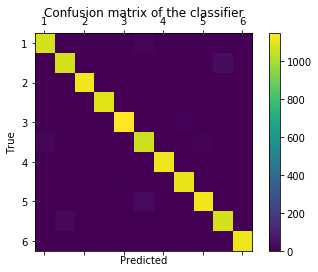

In [180]:
VisualizationConfusionMatrix(Y_test, list_final_all[3])

In [194]:
def GridSearchCV_hp_tuning(X_train, X_test, y_train, y_test):
    ##for SVM for best parameters
    from sklearn.svm import SVC
    from sklearn.model_selection import GridSearchCV 
    import matplotlib.pyplot as plt
    from sklearn.metrics import classification_report
    param_grid = {'C': [1, 10],  
                  'gamma': ('auto','scale'), 
                  'kernel': ['linear']}  
    grid = GridSearchCV(SVC(), param_grid, cv=2) 
    grid.fit(X_train, y_train)
    print('Best parameters: ', grid.best_params_) 
    print('Best estimator: ', grid.best_estimator_) 
    grid_predictions = grid.predict(X_test)
    acc = Accuracy(grid_predictions, y_test)
    print('Acc: ', acc)
    print(classification_report(y_test, grid_predictions))
    
    ##for Knn for best parameters
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier()
    params_knn = {'n_neighbors': [2,3,4,5], 
                  'weights': ['uniform'], 
                  'metric': ['euclidean'] 
                 }
    knn_grid = GridSearchCV(knn, params_knn, cv=3)
    knn_grid.fit(X_train, y_train)
    print('Best parameters: ', knn_grid.best_params_) 
    print('Best estimator: ', knn_grid.best_estimator_) 
    grid_predictions = knn_grid.predict(X_test)
    acc = Accuracy(grid_predictions, y_test)
    print('Acc: ', acc)
    print(classification_report(y_test, grid_predictions))
    
    ##for Decision Tree for best parameters
    from sklearn.tree import DecisionTreeClassifier as dt
    clf = dt()
    param_grid = {'max_depth':[1,2,3],
                  'min_samples_leaf':[1,2,3,4,5],
                  'min_samples_split':[2,3,4],
                  'criterion':['gini','entropy']
                 }
    grid = GridSearchCV(clf, param_grid, cv=10)
    grid.fit(X_train, y_train)
    print('Best parameters: ', grid.best_params_) 
    print('Best estimator: ', grid.best_estimator_)
    grid_predictions = grid.predict(X_test)
    acc = Accuracy(grid_predictions, y_test)
    print('Acc: ', acc)
    print(classification_report(y_test, grid_predictions))
    
    ##Tuning the hyperparameters
    ##for SVM: parameter C
    from sklearn.model_selection import GridSearchCV 
    from sklearn.metrics import classification_report 
    c_values = [0.1, 1, 10 , 100]
    acc = []
    for i in c_values:
        param_grid = {'C': [i],  
                      'gamma': ('auto','scale'), 
                      'kernel': ['linear']}  
        grid = GridSearchCV(SVC(), param_grid, cv=2) 
        grid.fit(X_train, y_train)
        print('Best parameters: ', grid.best_params_) 
        print('Best estimator: ', grid.best_estimator_) 
        grid_predictions = grid.predict(X_test)
        acc_1 = Accuracy(grid_predictions, y_test)
        acc.append(acc_1) 
    xi = list(range(len(c_values)))
    plt.plot(xi, acc, marker='o', linestyle='--', color='r', label='acc')
    plt.xlabel('C values',fontweight="bold",fontsize = 12)
    plt.ylabel('accuracy',fontweight="bold",fontsize = 12)
    plt.title("C vs accuracy for GridSearchCV SVM",fontweight="bold",fontsize = 16)
    plt.xticks(xi, c_values)
    plt.legend()
    plt.show()
    
    ##for SVM: parameter kernel
    from sklearn.model_selection import GridSearchCV 
    from sklearn.metrics import classification_report 
    kernel_values = ['linear', 'rbf']
    acc_k = []
    for i in kernel_values:
        # defining parameter range 
        param_grid = {'C': [10],  
                      'gamma': ('auto','scale'), 
                      'kernel': [i]}  
        grid = GridSearchCV(SVC(), param_grid, cv=2) 
        grid.fit(X_train, y_train)
        print('Best parameters: ', grid.best_params_) 
        print('Best estimator: ', grid.best_estimator_) 
        grid_predictions = grid.predict(X_test)
        acc_1 = Accuracy(grid_predictions, y_test)
        acc_k.append(acc_1)
    xi = list(range(len(kernel_values)))
    plt.plot(xi, acc_k, marker='o', linestyle='--', color='r', label='acc')
    plt.xlabel('kernel',fontweight="bold",fontsize = 12)
    plt.ylabel('accuracy',fontweight="bold",fontsize = 12)
    plt.title("kernels vs accuracy for GridSearchCV SVM",fontweight="bold",fontsize = 16)
    plt.xticks(xi, kernel_values)
    plt.legend()
    plt.show()

    ##for decision tree: parameter max_depth
    from sklearn.tree import DecisionTreeClassifier as dt
    max_depth_values = [1, 2, 3]
    acc_dep = []
    clf=dt()
    for i in max_depth_values:
        param_grid = {'max_depth':[i],
                      'min_samples_leaf':[1,2,3,4,5],
                      'min_samples_split':[2,3,4],
                      'criterion':['gini','entropy']}
        grid = GridSearchCV(clf,param_grid, cv=10)
        a = grid.fit(X_train, y_train)
        y_pred = grid.predict(X_test)
        print('Best parameters: ', grid.best_params_) 
        print('Best estimator: ', grid.best_estimator_)  
        grid_predictions = grid.predict(X_test)
        acc = Accuracy(grid_predictions, y_test)
        acc_dep.append(acc)
    xi = list(range(len(max_depth_values)))
    plt.plot(xi, acc_dep, marker='o', linestyle='--', color='r', label='acc')
    plt.xlabel('max_depth values',fontweight="bold",fontsize = 12)
    plt.ylabel('accuracy',fontweight="bold",fontsize = 12)
    plt.title("max_depth vs accuracy for GridSearchCV Decision Tree",fontweight="bold",fontsize = 16)
    plt.xticks(xi, max_depth_values)
    plt.legend()
    plt.show()
    
    ##for Knn: parameter K
    knn = KNeighborsClassifier()
    acc_knn = []
    n_values = [2, 3, 4, 5]
    for i in n_values:
        params_knn = {'n_neighbors': [i], 
                      'weights': ['uniform'], 
                      'metric': ['euclidean'] 
                     }
        knn_grid= GridSearchCV(knn, params_knn, cv=3)
        knn_grid.fit(X_train, y_train)
        print('Best parameters: ', grid.best_params_) 
        print('Best estimator: ', grid.best_estimator_)  
        grid_predictions = knn_grid.predict(X_test)
        acc_1 = Accuracy(grid_predictions, y_test)
        print('acc: ',acc_1)
        acc_knn.append(acc_1)
    xi = list(range(len(n_values)))
    plt.plot(xi, acc_knn, marker='o', linestyle='--', color='r', label='acc')
    plt.xlabel('k values',fontweight="bold",fontsize = 12)
    plt.ylabel('accuracy',fontweight="bold",fontsize = 12)
    plt.title("k vs accuracy for GridSearchCV Knn",fontweight="bold",fontsize = 16)
    plt.xticks(xi, n_values)
    plt.legend()
    plt.show()



Best parameters:  {'C': 10, 'gamma': 'auto', 'kernel': 'linear'}
Best estimator:  SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Acc:  90.91722959225197
              precision    recall  f1-score   support

           1       0.93      0.96      0.94      1090
           2       0.89      0.91      0.90      1106
           3       0.96      0.95      0.96      1124
           4       0.96      0.98      0.97      1102
           5       0.86      0.77      0.81      1165
           6       0.80      0.82      0.81      1091
           7       1.00      1.00      1.00      1117
           8       0.83      0.91      0.87      1115
           9       0.87      0.81      0.84      1162
          10       0.90      0.89      0.90      1099
          11       1.00      1.00      1.00      1116

    accurac

C:\Users\Astrid\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Best parameters:  {'C': 0.1, 'gamma': 'auto', 'kernel': 'linear'}
Best estimator:  SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Best parameters:  {'C': 1, 'gamma': 'auto', 'kernel': 'linear'}
Best estimator:  SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Best parameters:  {'C': 10, 'gamma': 'auto', 'kernel': 'linear'}
Best estimator:  SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Best parameters:  {'C': 100, 'gamma': 'auto', 'kernel':

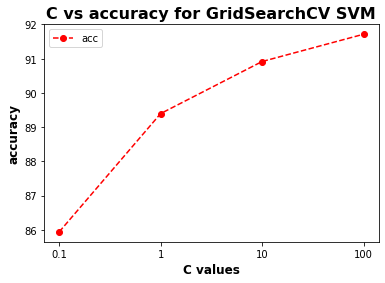

Best parameters:  {'C': 10, 'gamma': 'auto', 'kernel': 'linear'}
Best estimator:  SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Best parameters:  {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best estimator:  SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


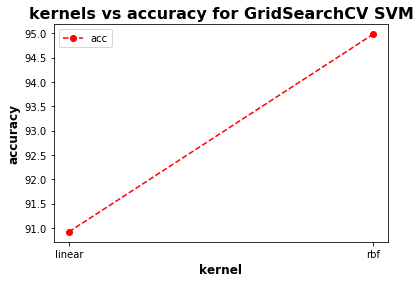

Best parameters:  {'criterion': 'entropy', 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best estimator:  DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=1,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
Best parameters:  {'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best estimator:  DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
   

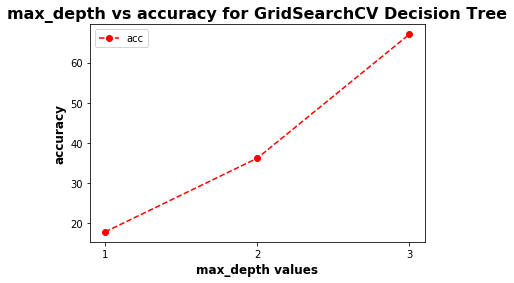

Best parameters:  {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best estimator:  DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
acc:  97.94905184341174
Best parameters:  {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best estimator:  DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf

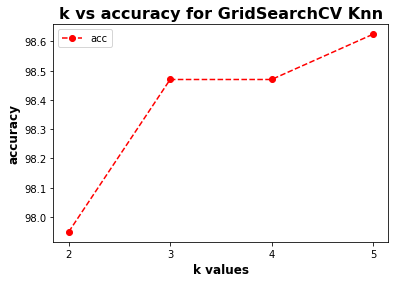

In [195]:
GridSearchCV_hp_tuning(X_train, X_test, Y_train, Y_test)

In [2]:
def RandomForest(X_train,Y_train,X_test):
    """
    :type X_train: numpy.ndarray
    :type X_test: numpy.ndarray
    :type Y_train: numpy.ndarray
    
    :rtype: numpy.ndarray
    """
    import sys 
    sys.setrecursionlimit(10**6) 
    n_trees=5
    n_bootstrap=100
    n_feat=2
    y_train = Y_train.reshape(Y_train.shape[0], 1)
   
    X_train_data=np.concatenate((X_train,y_train),axis=1)
    X_train_data=X_train_data[0:50]

    #def random_forest(X_train_data,n_trees,n_bootstrap,n_feat):
    forest=[]
    
    
    
    def get_col_based_splits(X_train_data,col_split,val_split):
        split_col_vals=X_train_data[:,col_split]
        greater_vals=X_train_data[split_col_vals > val_split]
        smaller_vals=X_train_data[split_col_vals <= val_split]
        return smaller_vals,greater_vals

    def compute_entropy(X_train_data):
        label=X_train_data[:,-1]
        _,cnt=np.unique(label,return_counts=True) 
        probabilities=cnt/cnt.sum()
        entropy=sum(probabilities*-np.log2(probabilities)) #elementwise probability 
        return entropy

    def bootstrapping(X_train_data,n_bootstrap):
        bootstrap_indices = np.random.randint(low=0, high=len(X_train_data), size=n_bootstrap)
        df_bootstrapped = X_train_data[bootstrap_indices]
        return df_bootstrapped

    def decision_tree(X_train_data,flag=0,min_samples=2,max_depth=5):
        label=X_train_data[:,-1]
        a=np.unique(label)
        unique_classes, Uniq_counts=np.unique(label,return_counts=True)
        largest_idx=Uniq_counts.argmax()
        classification=unique_classes[largest_idx]
        if len(a)==1:
            return True
        else:
            flag+=1
            n_splits={}
            _,cols=X_train_data.shape
            for i in range (cols-1):
                n_splits[i]=[]
                vals=np.unique(X_train_data[:,i])

                for j in range(len(vals)):
                    if j!=0:
                        curr_val=vals[j]
                        prev_val=vals[j-1]
                        split=(curr_val+prev_val)/2
                        n_splits[i].append(split)
            overall_entropy=999
            for i in n_splits:
                for val in n_splits[i]:
                    smaller_vals,greater_vals=get_col_based_splits(X_train_data,col_split=i,val_split=val)
                    all_data=len(smaller_vals)+len(greater_vals)
                    smaller_vals_pts=len(smaller_vals)/all_data
                    greater_vals_pts=len(greater_vals)/all_data
                    curr_total_entropy=(smaller_vals_pts*compute_entropy(smaller_vals)+greater_vals_pts*compute_entropy(greater_vals))
                if curr_total_entropy<=overall_entropy:
                    overall_entropy=curr_total_entropy
                    best_split_col=i
                    best_split_val=val
        #n_splits=get_nsplits(X_train)
        #col_split,val_split=best_split(X_train,n_splits)
        #print(col_split,val_split)
        smaller_vals,greater_vals=get_col_based_splits(X_train_data,best_split_col,best_split_val)
        quest="{} <= {}".format(best_split_col,best_split_val)
        subtree={quest:[]}
        ans_y=decision_tree(smaller_vals,flag,min_samples,max_depth)
        ans_n=decision_tree(greater_vals,flag,min_samples,max_depth)
        subtree[quest].append(ans_y)
        subtree[quest].append(ans_n)

        return subtree

    for x in range (n_trees):
        df_bootstrap=bootstrapping(X_train_data,n_bootstrap)
        tree=decision_tree(df_bootstrap)
        forest.append(tree)
    forest=np.array(forest)
    
    return forest



In [3]:
rand=RandomForest(X_train,Y_train,X_test)

In [4]:
rand

array([{'8 <= 0.8265076315776274': [{'40 <= 0.15422838843131165': [{'23 <= 0.9561378416003965': [{'32 <= 0.4111125160025921': [{'41 <= 0.37277026560696924': [{'47 <= 0.4353099730458233': [{'28 <= 0.5849365844944623': [{'14 <= 0.17546622260307249': [{'47 <= 0.42520215633423264': [{'39 <= 0.00036750671560333763': [{'11 <= 0.778534786790638': [{'11 <= 0.7451557900259407': [{'11 <= 0.7284371447725086': [{'11 <= 0.7179559299309219': [{'27 <= 0.5450609497102092': [{'34 <= 0.2673178445244233': [{'17 <= 0.10970688564499947': [{'25 <= 0.5837665150530649': [{'37 <= 0.12260666956771123': [{'25 <= 0.5767124214858134': [{'44 <= 0.534386617100372': [{'35 <= 0.2666186537544973': [{'35 <= 0.2603663603119504': [{'0 <= 0.5967590169768269': [{'29 <= 0.6485076784207762': [{'25 <= 0.5712065013356438': [{'27 <= 0.5447058245908902': [{'27 <= 0.5443040908696466': [{'24 <= 0.5432674608120416': [{'24 <= 0.5427065756675136': [{'11 <= 0.6256623626453699': [{'27 <= 0.543897817319857': [{'29 <= 0.6301443649300004':